import libraries to perform the task

In [ ]:
import pandas as pd
import numpy as np

import dataset

In [ ]:
data=pd.read_csv('Dataset1.csv')
data.head()

,RECEPTOR_LIGAND,pIC50,ESTAT,HB,VDW,DSOLV
0,3pm0_ab_1_BC,6.619789,-0.0605,-1.2707,-12.5334,3.2176
1,3pm0_ab_4_BC,4.698970,-0.0482,-0.5903,-8.6868,1.5751
2,3pm0_ab_5_BC,6.602060,-0.3955,-1.0635,-12.5881,1.7955
3,3pm0_ab_6_BC,6.920819,-0.1713,-0.6000,-12.3158,1.2083
4,3pm0_ab_7_BC,7.154902,-0.0624,-0.5607,-12.4820,1.4207


Define x and y

In [ ]:
y = data['pIC50']
x = data.drop(labels=['RECEPTOR_LIGAND', 'pIC50'], axis = 'columns')

In [ ]:
print(x)

          ESTAT      HB      VDW      DSOLV
0       -0.0605 -1.2707 -12.5334     3.2176
1       -0.0482 -0.5903  -8.6868     1.5751
2       -0.3955 -1.0635 -12.5881     1.7955
3       -0.1713 -0.6000 -12.3158     1.2083
4       -0.0624 -0.5607 -12.4820     1.4207
..          ...     ...      ...        ...
316      0.1271 -1.4212 -10.4479     1.8965
317     -0.1184 -0.8472 -14.7992     3.2839
318     -0.0787 -1.1483 -13.3799     2.9682
319     -0.0639 -0.4082 -11.4333     0.0561
320     -0.0617 -1.2691 -12.7439     2.0174

[321 rows x 4 columns]


In [ ]:
print(y)

0      6.619789
1      4.698970
2      6.602060
3      6.920819
4      7.154902
         ...   
316    6.301030
317    5.387216
318    5.004365
319    5.468521
320    6.853872
Name: pIC50, Length: 321, dtype: float64


split the database to train and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

Train the model on training **set**

In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

Predict the test set results

In [ ]:
y_pred=ml.predict(x_test)
print(y_pred)

[7.49253465 7.53583729 6.77622853 8.01582695 6.76319179 6.7099665
 6.3729043  7.1685107  7.50800742 6.95570706 6.77598911 6.75660052
 7.38792444 7.23312023 7.75607616 7.81981214 8.49068094 6.29612651
 7.48273903 7.435294   6.81269836 7.44303664 5.90538029 7.2976938
 7.49010669 7.51747414 6.88144408 6.68556628 7.3044501  6.50780271
 6.94481655 7.27231216 6.9815109  7.20916449 7.99122316 7.42132913
 7.44562638 7.23090417 6.4344831  6.66684053 6.62082062 6.78314312
 7.24402728 7.40204526 7.62572113 7.0948196  6.37750524 6.6966292
 7.15629063 6.45978977 7.26489514 6.78044563 6.99133289 7.93403754
 7.62556425 6.77765884 6.75225077 7.81437382 7.18610675 7.4667159
 6.06240972 6.9007953  7.09343733 7.47327656 7.37673897 6.40032644
 7.44837813 6.60826305 6.50657029 6.8896797  7.36593856 6.24424639
 7.33755226 8.22804095 8.14728466 6.9083104  6.81894884 7.19912051
 7.02186799 7.29534185 5.55220235 6.57731289 7.32545424 7.32049392
 7.51430033 6.29075082 6.82669528 7.66874304 6.86268616 6.87885527

In [ ]:
ml.predict([[-0.0605,-1.2707,-12.5334,3.2176]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([6.70081402])

In [ ]:
print(ml.coef_)
print(ml.intercept_)
ml.score(x_train,y_train)

[1.58857334 0.7907093  0.11631376 0.24844491]
8.460087487354265


0.1889416108439721

Evaluate the model

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.17674901501440987

Plot the result

Text(0.5, 1.0, 'Actual v/s Predicted')

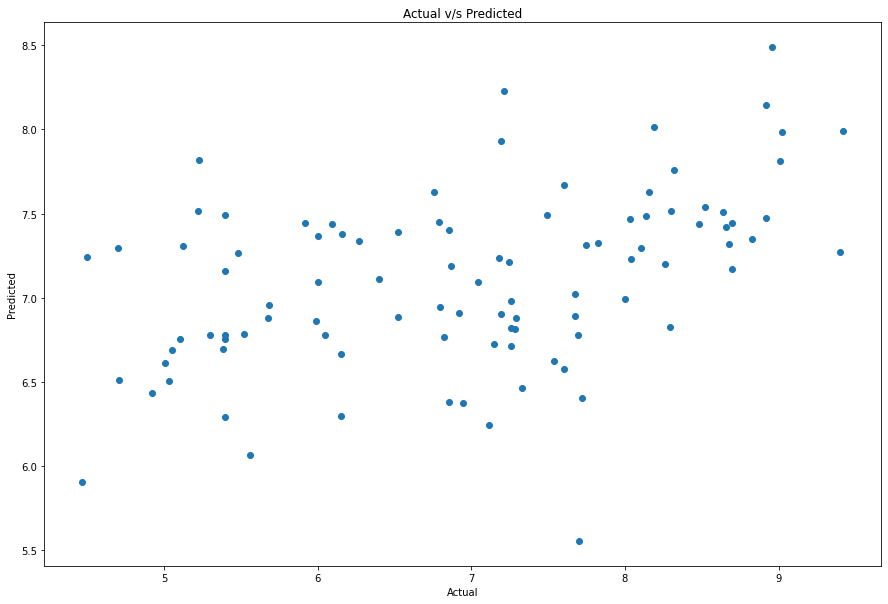

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted')

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


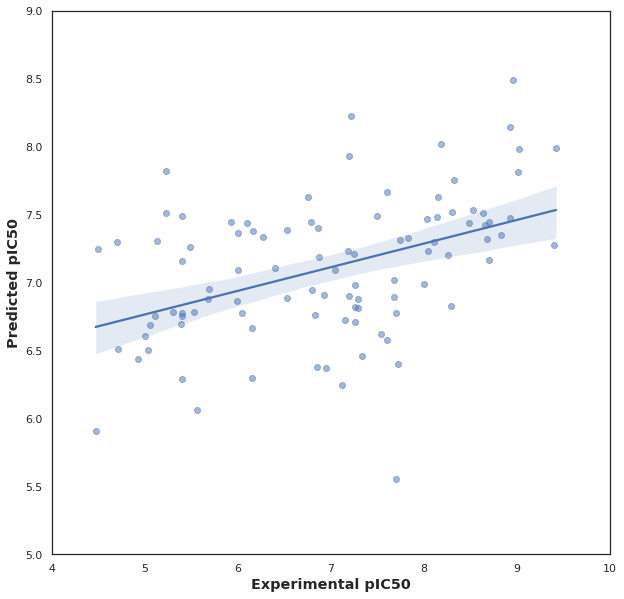

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.5})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(4, 10)
ax.set_ylim(5, 9)
ax.figure.set_size_inches(10, 10)
plt.show
plt.savefig('Linear regression plot')

In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference': y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
271,7.494850,7.492535,0.002315
47,8.522879,7.535837,0.987041
301,6.045757,6.776229,-0.730471
218,8.187087,8.015827,0.171260
284,6.823909,6.763192,0.060717
18,7.259637,6.709966,0.549671
133,6.949234,6.372904,0.576329
172,8.698970,7.168511,1.530459
45,8.638272,7.508007,1.130265
302,5.686133,6.955707,-1.269574
